In [1]:
import torch
import torchvision
import torchvision.transforms as T
from pan_radiographs_data import FullRadiographDataset
from autoencoder import Autoencoder
import matplotlib.pyplot as plt

In [2]:
root_dir = "/datasets/pan-radiographs/"
transforms = T.Compose([
    T.Resize((224,224)),
    T.Grayscale(),
    T.ToTensor(),
])
ds = FullRadiographDataset(root_dir, [1], transforms)

> Successfully Loaded 550 images.


In [4]:
ae = Autoencoder(input_size=224, bottleneck_dim=2048, input_channels=1)
checkpoint = torch.load("checkpoints/best_loss-2048.pt")
ae.load_state_dict(checkpoint["state_dict"]())

<All keys matched successfully>

# Comparison

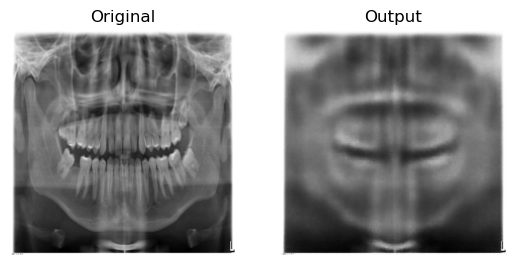

In [5]:
original_img = ds[0][0]
decoded_img = ae(original_img.view(1,1,224,224)).detach().numpy()[0]

plt.subplot(1,2,1).axis('off')
plt.title("Original")
plt.imshow(original_img[0], cmap="grey")
plt.subplot(1,2,2).axis('off')
plt.title("Output")
plt.imshow(decoded_img[0], cmap="grey")


torch.Size([1, 1, 224, 224])


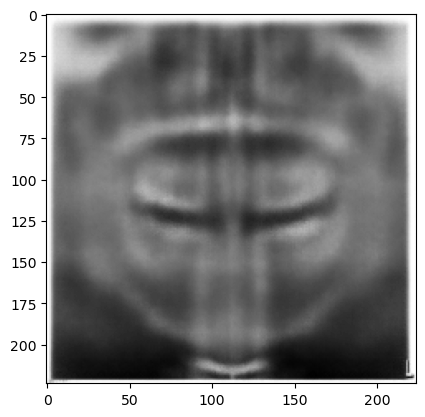

In [6]:
img = ds[0][0].view(1,1,224,224)
print(img.shape)
img = ae(img).detach().numpy()[0][0]
img = plt.imshow(img, cmap="grey")